In [1]:
## struct5 has a reversed order of layers for the CNN model.
## dataset100sr_10tau is the dataset used.

In [2]:
# Import dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, utils, activations
from tensorflow.keras import optimizers, losses, metrics, preprocessing
from google.colab import drive

In [3]:
# Connect to the Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_directory = "/content/drive/My Drive/dataset_100sr_10tau"
chart_title = "PQD CNN - struct5 - dataset100sr_10tau"
model_title = "pqd_cnn_struct5_dataset100sr_10tau_model.h5"

In [5]:
# Import the training dataset
training_dataset = utils.image_dataset_from_directory(
    directory=dataset_directory + "/training_set",
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)
# Import the validation dataset
validation_dataset = utils.image_dataset_from_directory(
    directory=dataset_directory + "/validation_set",
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)
# Import the testing dataset
testing_dataset = utils.image_dataset_from_directory(
    directory=dataset_directory + "/testing_set",
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 6000 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.


In [6]:
# Build the CNN model - struct5
cnn = models.Sequential()
# Add first convolution layer
cnn.add(layers.Conv2D(
    filters=64, 
    kernel_size=(5, 5), 
    padding='valid', 
    activation='relu', 
    input_shape=(200, 200, 1)
    )
)
cnn.add(layers.AvgPool2D(
    pool_size=(2, 2)
    )
)
# Add second convolution layer
cnn.add(layers.Conv2D(
    filters=48, 
    kernel_size=(3, 3), 
    padding='valid',
    activation='relu'
    )
)
cnn.add(layers.AvgPool2D(
    pool_size=(2, 2)
    )
)
# Add final convolution layer
cnn.add(layers.Conv2D(
    filters=32, 
    kernel_size=(3, 3), 
    padding='valid',
    activation='relu'
    )
)
# Add fully-connected layer
cnn.add(layers.Flatten())
cnn.add(layers.Dense(
    units=10,
    activation='softmax'
    )
)

In [7]:
# Show the structure of the CNN
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 64)      1664      
                                                                 
 average_pooling2d (AverageP  (None, 98, 98, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 48)        27696     
                                                                 
 average_pooling2d_1 (Averag  (None, 48, 48, 48)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        13856     
                                                                 
 flatten (Flatten)           (None, 67712)             0

In [8]:
# Configure the CNN for training
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
# Train the CNN for 10 epochs with the training dataset
# Validate the CNN with the validation dataset
history = cnn.fit(
    training_dataset,
    epochs=10,
    validation_data=validation_dataset
)

Epoch 1/10
188/188 [==============================] - 987s 5s/step - loss: 12.6098 - accuracy: 0.8145 - val_loss: 0.0798 - val_accuracy: 0.9735
Epoch 2/10
188/188 [==============================] - 12s 65ms/step - loss: 0.0906 - accuracy: 0.9673 - val_loss: 0.0776 - val_accuracy: 0.9675
Epoch 3/10
188/188 [==============================] - 12s 63ms/step - loss: 0.0721 - accuracy: 0.9728 - val_loss: 0.0895 - val_accuracy: 0.9710
Epoch 4/10
188/188 [==============================] - 12s 64ms/step - loss: 0.0706 - accuracy: 0.9745 - val_loss: 0.0731 - val_accuracy: 0.9720
Epoch 5/10
188/188 [==============================] - 12s 64ms/step - loss: 0.0653 - accuracy: 0.9742 - val_loss: 0.1386 - val_accuracy: 0.9745
Epoch 6/10
188/188 [==============================] - 12s 64ms/step - loss: 0.0746 - accuracy: 0.9725 - val_loss: 0.0709 - val_accuracy: 0.9715
Epoch 7/10
188/188 [==============================] - 12s 64ms/step - loss: 0.0775 - accuracy: 0.9743 - val_loss: 0.0756 - val_accuracy:

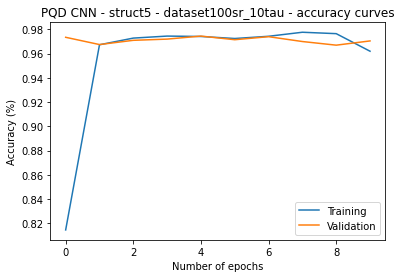

In [10]:
# Plot the training and validation accuracy of the CNN
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(chart_title + " - accuracy curves")
plt.ylabel('Accuracy (%)')
plt.xlabel('Number of epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

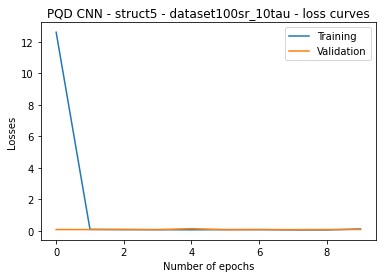

In [11]:
# Plot the training and validation loss levels of the CNN
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(chart_title + " - loss curves")
plt.ylabel('Losses')
plt.xlabel('Number of epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [12]:
# Evaluate the CNN with the testing dataset
results = cnn.evaluate(
    testing_dataset
)

63/63 [==============================] - 258s 4s/step - loss: 0.0792 - accuracy: 0.9760


In [13]:
# Save the trained model
cnn.save('/content/drive/My Drive/saved_models/' + model_title)